In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading data for 3 resolutions

In [2]:
res=[1,2,3]
step=10
datam=[]
databeta=[]
datapsi=[]
dataderpsi=[]
datagrid=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    m=[]
    beta=[]
    psi=[]
    derpsi=[]
    grid=[]
    
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i*step), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        #print(type(df[0]))
        aux = [float(x) for x in df[0]]
        m.append(aux)
        aux = [float(x) for x in df[1]]
        beta.append(aux)
        aux = [float(x) for x in df[2]]
        psi.append(aux)
        aux = [float(x) for x in df[3]]
        derpsi.append(aux)
        aux = [float(x) for x in df[4]]
        grid.append(aux)

    # f[i] is the array of the values of m on the whole grid on time step i
    
    
    datam.append(m)
    databeta.append(beta)
    datapsi.append(psi)
    dataderpsi.append(derpsi)
    datagrid.append(grid)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1 is:  21
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2 is:  41
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3 is:  81


In [3]:
final_t=count
print(count)

81


In [4]:
print(datam[0][0][1]) # datam indexes give res, time then gridpoint

-5.6819055003955166e-21


In [5]:
L=len(datam[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

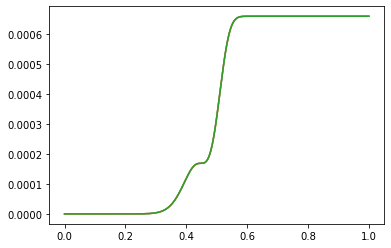

In [6]:
plt_x1 = np.linspace(0, 1, L)
plt_x2 = np.linspace(0, 1, 2*L-1)
plt_x3 = np.linspace(0, 1, 4*L-3)

plt.plot(plt_x1,datam[0][0][3:len(datam[0][0])-3])
plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [7]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

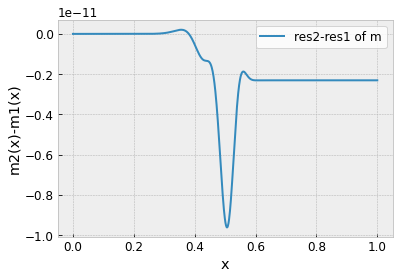

In [8]:
# for given t
t1=2 #last timestep
t2=2*t1
t3=4*t1
auxm = []
auxbeta = []
auxpsi = []
auxderpsi = []
auxgrid = []

for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxm.append(datam[1][t2][i])
        auxbeta.append(databeta[1][t2][i])
        auxpsi.append(datapsi[1][t2][i])
        auxderpsi.append(dataderpsi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))
diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

with plt.style.context('bmh'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

# Pointwise convergence tests: plots for thesis project report 

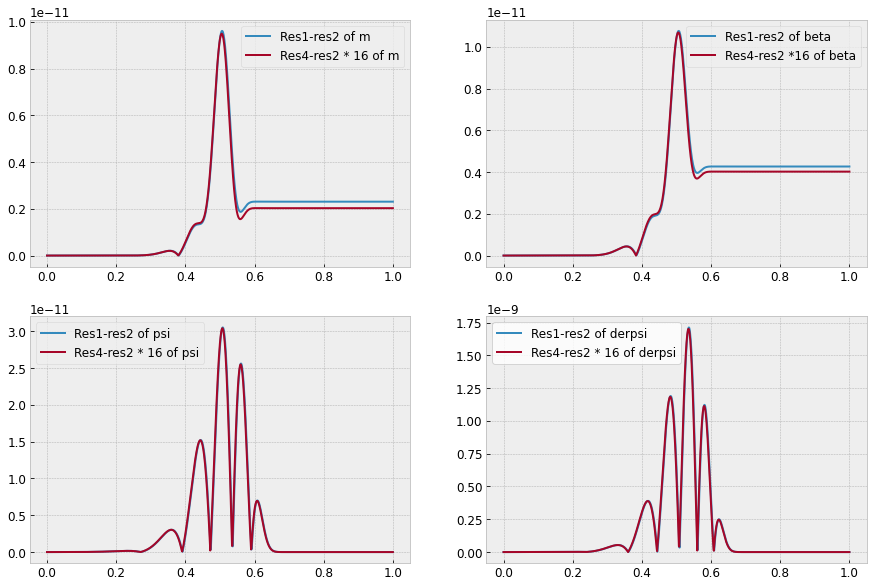

In [9]:
# for given t

aux2m = []
aux2beta = []
aux2psi = []
aux2derpsi = []
aux2grid = []
for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2m.append(datam[2][t3][i])
        aux2beta.append(databeta[2][t3][i])
        aux2psi.append(datapsi[2][t3][i])
        aux2derpsi.append(dataderpsi[2][t3][i])
        aux2grid.append(datagrid[2][t3][i])
        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxm,aux2m))
diffs_4_2.append(np.subtract(auxbeta,aux2beta))
diffs_4_2.append(np.subtract(auxpsi,aux2psi))
diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))
diffs_4_2.append(np.subtract(auxgrid,aux2grid))

with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, abs(diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, abs(diffs_4_2[0])*16, label='Res4-res2 * 16 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, abs(diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, abs(diffs_4_2[1])*16, label='Res4-res2 *16 of beta')
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, abs(diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, abs(diffs_4_2[2])*16, label='Res4-res2 * 16 of psi')
    ax[1][0].legend()
    
    """ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([20, 22])#4.90,5
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()"""

    ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([20, 22])#4.90,5
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()

plt.legend()
plt.show()



# L2 norm convergence tests

In [10]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(5):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("m convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("beta convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("psi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

print("derpsi convergence factor:")
print(math.log2(norm_low_med[3]/norm_med_high[3]))
print("")


m convergence factor:
4.081400990196838

beta convergence factor:
4.055459945166004

psi convergence factor:
4.004789060710381

derpsi convergence factor:
4.00812052230995



# Q(t)

In [11]:
Q_m = []
Q_beta = []
Q_psi = []
Q_derpsi = []

for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxpsi = []
    auxderpsi = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxpsi.append(datapsi[1][t2][i])
            auxderpsi.append(dataderpsi[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))

    # for given t

    aux2m = []
    aux2beta = []
    aux2psi = []
    aux2derpsi = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2psi.append(datapsi[2][t3][i])
            aux2derpsi.append(dataderpsi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxpsi,aux2psi))
    diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))


    ####

    norm_low_med = []
    norm_med_high = []

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
        for i in diffs_4_2[j]:
            b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))

/tmp/ipykernel_13357/1538885732.py:74: RuntimeWarning: invalid value encountered in double_scalars
  Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
/tmp/ipykernel_13357/1538885732.py:75: RuntimeWarning: invalid value encountered in double_scalars
  Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))


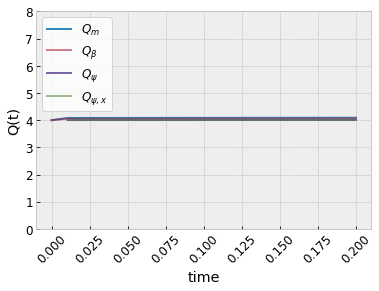

In [12]:
#plt_x = range(0,int(final_t/4))
plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))

with plt.style.context('bmh'):
    plt.plot(plt_x, Q_m, label = '$Q_m$')
    plt.plot(plt_x, Q_beta, label = '$Q_{\\beta}$',alpha=0.5)
    plt.plot(plt_x, Q_psi, label = '$Q_{\psi}$')
    plt.plot(plt_x, Q_derpsi, label = '$Q_{\psi,x}$',alpha=0.5)
    

plt.ylim([0, 8])

plt.legend(loc ="upper left")
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('Q(t)')
plt.show()

In [13]:
Q_derpsi

[nan]

# Fixed grid and changing timestep

In [375]:
aux=[]
for i in range(0,len(time_arrays[1])):
    if i%2==0:
        aux.append(time_arrays[1][i])
aux       
np.subtract(time_arrays[0],aux)

array([ 0.00000000e+00, -2.57104789e-11, -5.43822626e-11, -8.30540497e-11,
       -1.11725712e-10, -1.40397360e-10, -1.69069009e-10, -1.97740546e-10,
       -2.26412056e-10, -2.55083565e-10, -2.83755075e-10, -3.12426585e-10,
       -3.41098094e-10, -3.69769881e-10, -3.98441946e-10, -4.27114011e-10,
       -4.55786076e-10, -4.84458140e-10, -5.13130205e-10, -5.41802270e-10,
       -5.70474334e-10, -5.99146399e-10, -6.27818464e-10, -6.56490529e-10,
       -6.85162593e-10, -7.13834658e-10, -7.42506168e-10, -7.71177677e-10,
       -7.99849187e-10, -8.28520696e-10, -8.57192206e-10, -8.85863716e-10,
       -9.14535225e-10, -9.43206735e-10, -9.71878245e-10, -1.00054975e-09,
       -1.02922126e-09, -1.05789277e-09, -1.08656428e-09, -1.11523579e-09,
       -1.14390730e-09])

In [369]:
time_arrays=[]
for resolution in res:
    with pd.option_context('display.precision', 20):
        df = pd.read_csv("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/timearray{}.csv".format(resolution), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        aux = [float(x) for x in df[0]]
        time_arrays.append(aux)

In [370]:
#time_arrays[0]

In [371]:
x_i = 0
np.transpose(datam[0])[x_i] #this array is the value of m over time at gridpoint x_i

array([-1.37892692e-17,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18,  1.09960681e-18,  1.09960681e-18,  1.09960681e-18,
        1.09960681e-18])

In [372]:
interp_funcs_res2=[]
for x_i in range(3,len(dataderpsi[1][0])-3): #iterate over gridpoints on grid with res2, ignoring ghostpoints
    
    if x_i%2!=0:

        x=time_arrays[1]
        y = np.transpose(dataderpsi[1])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        f=interpolate.interp1d(x, y)
        interp_funcs_res2.append(f)
        #plt.scatter(x,y)
        #plt.ylim([-0.002, 0.002])
        #plt.show()
        
interp_funcs_res4=[]
for x_i in range(3,len(dataderpsi[2][0])-3): #iterate over gridpoints on grid with res4, ignoring ghostpoints
    
    if (x_i+1)%4==0:
        
        x=time_arrays[2]
        y = np.transpose(dataderpsi[2])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        f=interpolate.interp1d(x, y)
        interp_funcs_res4.append(f)

In [373]:
diffs_2_1=[]
diffs_4_2=[]

for j in range(0,len(dataderpsi[0])): #iterate on time
    aux2=[]
    aux4=[]
    
    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints
        t=time_arrays[0][j]
        #print(t)
        aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))
        aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))
    #print(np.subtract(aux2,aux4))
    #print(aux4)
    diffs_2_1.append(aux2)
    diffs_4_2.append(aux4)

In [374]:
######## t=0 ########
normlow_med=0
for i in diffs_2_1[1]:
    normlow_med += i**2
normlow_med=math.sqrt(normlow_med)
normmed_high=0
for i in diffs_4_2[1]:
    normmed_high += i**2
normmed_high=math.sqrt(normmed_high)

math.log2(normlow_med/normmed_high)

-0.08509410394903867

In [327]:
len(diffs_2_1)

11

# ****

interpolate m data (z) on grid (x) and time (y), resolution 2

In [57]:
import numpy as np
from scipy import interpolate

Nt = len(datam[1]) #number of timesteps

# grid
x=[]
for i in range(0,Nt):
    Nx = len(datagrid[1][i])
    for j in range(0,Nx):
        x.append(datagrid[1][i][j])

# time
y=[]
for i in range(0,Nt):
    Nx = len(datam[1][i])
    for j in range(0,Nx):
        y.append(time_arrays[1][i])

# data
z=[]
for i in range(0,Nt):
    Nx = len(datam[1][i])
    for j in range(0,Nx):
        z.append(datam[1][i][j])


interp2=interpolate.interp2d(x, y, z, kind='quintic')

/home/rita13santos/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=5,5 nx,ny=127,17 m=5035 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


interpolate m data (z) on grid (x) and time (y), resolution 3

In [58]:
import numpy as np
from scipy import interpolate

Nt = len(datam[2]) #number of timesteps

# grid
x=[]
for i in range(0,2):
    Nx = len(datagrid[2][i])
    for j in range(0,Nx):
        x.append(datagrid[2][i][j])

# time
y=[]
for i in range(0,2):
    Nx = len(datam[2][i])
    for j in range(0,Nx):
        y.append(time_arrays[2][i])

# data
z=[]
for i in range(0,2):
    Nx = len(datam[2][i])
    for j in range(0,Nx):
        z.append(datam[2][i][j])


interp4=interpolate.interp2d(x, y, z, kind='quintic')


/home/rita13santos/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=5,5 nx,ny=114,13 m=4014 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


3D plot of m data over time

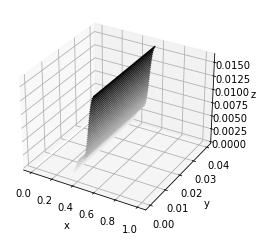

In [67]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = datagrid[1][0]
y = time_arrays[1]

X, Y = np.meshgrid(x, y)
#Z=f(X,Y)
Z = []
for i in range(0,len(y)):
    aux=[]
    for k in range(0,len(x)):
        aux.append(datam[1][i][k])
    Z.append(aux)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


In [66]:
len(y)

5

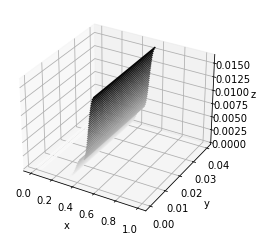

In [75]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 1, 200)
y = np.linspace(0, 0.04, 5)

X, Y = np.meshgrid(x, y)
#Z=f(X,Y)
Z = []
for i in range(0,len(y)):
    aux=[]
    for k in range(0,len(x)):
        aux.append(interp2(x[k],y[i])[0])
    Z.append(aux)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [60]:
t1=0
diffs_2_1=[]
for i in range(0,len(time_arrays[0])):#iterate on t
    auxm=[]
    t1 = time_arrays[0][i]
    for j in range(0,len(datam[0][i])):
        x = datagrid[0][i]
        auxm.append(interp2(x,t)[0])
    diffs_2_1.append(np.subtract(datam[0][i],auxm))
len(auxm) 
    


507

In [61]:
t1=0
diffs_4_2=[]
for i in range(0,len(time_arrays[0])):#iterate on t
    auxm2=[]
    auxm4=[]
    t1 = time_arrays[0][i]
    for j in range(0,len(datam[0][i])):
        x = datagrid[0][i]
        auxm2.append(interp2(x,t)[0])
        auxm4.append(interp4(x,t)[0])
    diffs_4_2.append(np.subtract(auxm4,auxm2))
len(auxm) 
    


507

In [47]:
norm_low_med = []
norm_med_high = []

for j in range(0,len(time_arrays)):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))

Q_m

In [48]:
Q_m

[3.998204305872114, 4.013585341089867, 32.7443907763087]

# Evolving grid

In [23]:
len(datagrid[0][0])

507

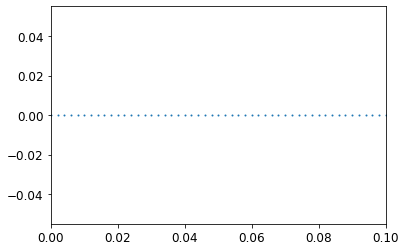

In [24]:
y=np.zeros(len(datagrid[0][0]))

#for i in range(len(datagrid[0][0])):
plt.scatter(datagrid[0][60],y, s=1)
plt.xlim([0,0.1])
plt.show()

In [ ]:
for i in datagrid[0][60]:
    plt.axvline(x = i, color = 'b',linewidth=0.2)
plt.xlim([0.9, 0.91])
plt.show()

for i in datagrid[0][60]:
    plt.axvline(x = i, color = 'b',linewidth=0.2)
plt.xlim([0.0, 0.01])
plt.show()

In [ ]:
datagrid[0][0]